<a href="https://colab.research.google.com/github/jburchfield76/datasharing/blob/master/DASC_EDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#import the needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [5]:
#Read the file in data without first two rows as it is of no use.
data= pd.read_csv("Marketing_Analysis.csv", skiprows = 2, low_memory=False)

# Drop the customer id as it is of no use.
data.drop('customerid', axis = 1, inplace = True)


In [6]:
#Extract job & Education in newly from "jobedu" column.
data['job']= data["jobedu"].apply(lambda x: x.split(",")[0])
data['education']= data["jobedu"].apply(lambda x: x.split(",")[1])

# Drop the "jobedu" column from the dataframe.
data.drop('jobedu', axis = 1, inplace = True)


In [10]:
#Find the mode of month in data
month_mode = data.month.mode()[0]

# Fill the missing values with mode value of month in data.
data.month.fillna(month_mode, inplace = True)

# Let's see the null values in the month column.
missing_months = data.month.isnull().sum()

age_mode = data.age.mode()[0]
data.age.fillna(age_mode, inplace = True)      #these two lines are not in instructions, but are to make age=0 (no nulls)


#drop the records with response missing in data, this line is still needed
data = data[~data.response.isnull()].copy()

# Calculate the missing values in each column of data frame
missing_values = data.isnull().sum()
print(missing_values)


age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64


<ipython-input-10-40af4c6cbe13>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.month.fillna(month_mode, inplace = True)
<ipython-input-10-40af4c6cbe13>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

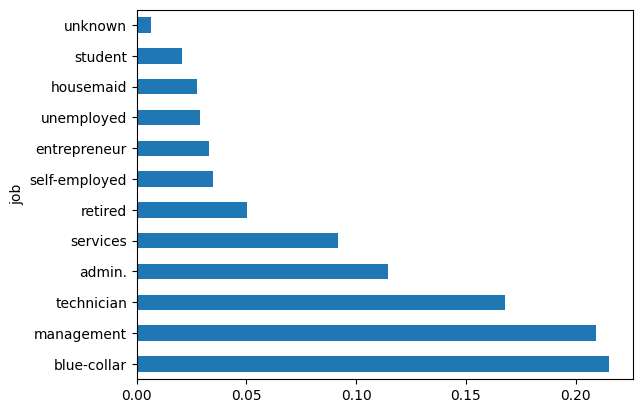

In [11]:
# Let's calculate the percentage of each job status category.
data.job.value_counts(normalize=True)

# plot the bar graph of percentage job categories
data.job.value_counts(normalize=True).plot.barh()
plt.show()


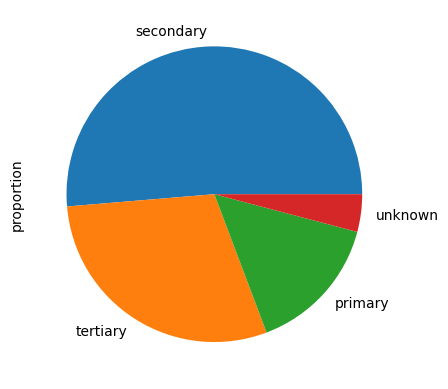

In [12]:
#plot the pie chart of education categories
data.education.value_counts(normalize=True).plot.pie()
plt.show()

In [13]:
print(data.salary.describe())

count     45181.000000
mean      57005.046369
std       32089.163369
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64


In [14]:
print(data.groupby('response')['salary'].mean())

response
no     56770.917933
yes    58771.704180
Name: salary, dtype: float64


In [15]:
print(data.groupby('response')['salary'].median())

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64


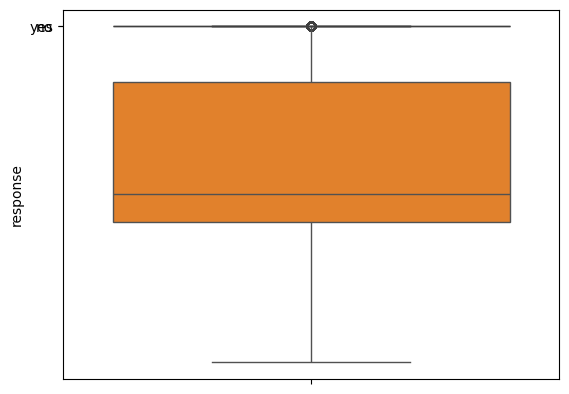

In [16]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(data.response)
sns.boxplot(data.salary)
plt.show()

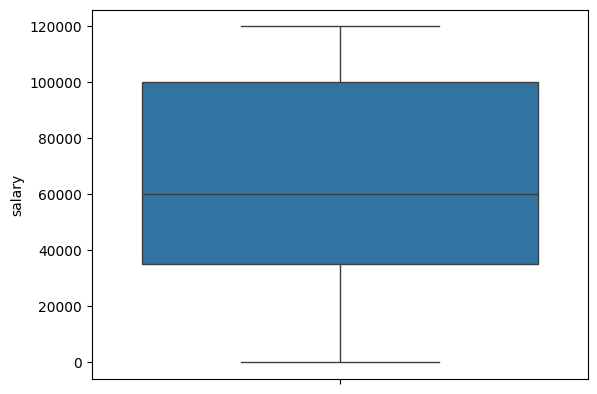

In [17]:
filtered_data = data[data['response'] == 'yes']

# Create a box plot for 'salary' in the filtered data
sns.boxplot(data=filtered_data['salary'])
plt.show()